In [10]:
import numpy as np
import time
from forward_network import ForwardNetwork           

In [11]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

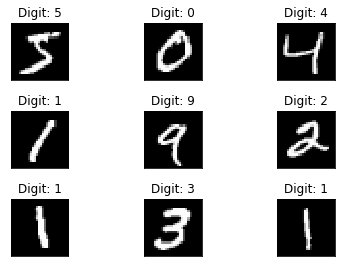

In [12]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title('Digit: {}'.format(Y_train[i]))
    plt.xticks([])
    plt.yticks([])
X_train = X_train
Y_train = Y_train
X_train.shape

X_train = X_train.reshape(60000, 784)
X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.reshape(10000, 784)
X_test = X_test.astype('float32')
X_test /= 255

In [13]:
# Convert y to arrays of 1 and 0
y_new = np.empty((60000, 10))

for i in range(len(Y_train)):
    for j in range(10):
        y_new[i,j] = Y_train[i] == j
y_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
network = ForwardNetwork(X_train.T, y_new.T)        
network.add_layer(20)
network.add_layer(10)
network.train(1000, 1, 10)


Epochs done: 0/1000
Epochs done: 100/1000
Epochs done: 200/1000
Epochs done: 300/1000
Epochs done: 400/1000
Epochs done: 500/1000
Epochs done: 600/1000
Epochs done: 700/1000
Epochs done: 800/1000


In [ ]:
y_pred_train = network.predict(X_train.T)
y_pred_test = network.predict(X_test.T)
train_acc = network.accuracy(y_pred_train, Y_train)
test_acc = network.accuracy(y_pred_test, Y_test)

print(train_acc)
print(test_acc)

In [ ]:
X_test = X_test.reshape(10000, 28, 28)
fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(X_test[i], cmap='gray', interpolation='none')
    plt.title('Digit: {}, Pred: {}'.format(Y_test[i], y_pred_test[i]))
    plt.xticks([])
    plt.yticks([])